In [1]:
from math import *
import cvxpy as cp
import numpy as np
import matplotlib.pyplot as plt
from typing import Tuple

6. Matrix Completion

(ii) Define the useful matrices and all

In [2]:
# Generate a random matrix, for which each entry is an iid random variable 
# drawn from the standard normal distribution

def A(m, n):
    A = np.array([[np.random.normal() for i in range(n)] for j in range(m)])
    return A

In [3]:
r = 2
m = 100
n = 100
U = A(m, r)
V = A(n, r)

Z = U @ np.transpose(V)

In [4]:
# Now generate the Omegas
def Omegas(m, n, s):
    Om = [[0 for i in range(m)] for j in range(n)]
    OM = []
    for k in range(s):
        i = np.random.random_integers(0, m-1)
        j = np.random.random_integers(0, n-1)
        while Om[i][j] != 0:
            i = np.random.random_integers(0, m-1)
            j = np.random.random_integers(0, n-1)
        Om[i][j] = 1
        OM += [(i,j)]
    return(Om, OM)

In [5]:
K_range = [i for i in range(100, 4100, 100)]

(iii) Solving and plots

In [6]:
MSE = []
for K in K_range:
    # Variables
    Om, OM = Omegas(m, n, K)
    # Construct the problem
    x_ = cp.Variable((m, n))
    objective = cp.Minimize(cp.norm(x_, 'nuc'))
    constraints = [x_[i][j] == Z[i][j] for (i,j) in OM]
    prob = cp.Problem(objective, constraints)
    # Solve
    result = prob.solve()
    X      = x_.value
    mse  = 0
    for i in range(m):
        for j in range(n):
            if Om[i][j] == 0:
                mse += (X[i][j] - Z[i][j])**2
    MSE = MSE + [mse / (m*n - K)] 

C:\Users\cecil\AppData\Local\Temp\ipykernel_19612\1326060934.py:6: DeprecationWarning: This function is deprecated. Please call randint(0, 99 + 1) instead
  i = np.random.random_integers(0, m-1)
C:\Users\cecil\AppData\Local\Temp\ipykernel_19612\1326060934.py:7: DeprecationWarning: This function is deprecated. Please call randint(0, 99 + 1) instead
  j = np.random.random_integers(0, n-1)
C:\Users\cecil\AppData\Local\Temp\ipykernel_19612\1326060934.py:9: DeprecationWarning: This function is deprecated. Please call randint(0, 99 + 1) instead
  i = np.random.random_integers(0, m-1)
C:\Users\cecil\AppData\Local\Temp\ipykernel_19612\1326060934.py:10: DeprecationWarning: This function is deprecated. Please call randint(0, 99 + 1) instead
  j = np.random.random_integers(0, n-1)


In [7]:
print(MSE)

[1.645448758306801, 1.6391099692063882, 1.4506250781916235, 1.1496341385147384, 0.8083935740299971, 0.6987245556905418, 0.44071670357620046, 0.4536818541140566, 0.27069161074188386, 0.19602335826373338, 0.03767427106098243, 0.09268648729116953, 0.013290373013410895, 0.01593980106822103, 0.03429063258212356, 0.03573739684651468, 0.02393636472176973, 0.003402049361462649, 0.010032627654242605, 1.919266594644266e-10, 4.3186494253815466e-11, 0.007839075478368922, 5.2472041607360696e-11, 1.2517703537662604e-11, 0.004296763451232763, 1.1681856993597382e-11, 8.786681569874783e-12, 3.676253223769635e-10, 8.115647867078158e-11, 1.546380017864972e-10, 2.76314535054821e-10, 9.011882061396166e-12, 1.7710311403060095e-11, 4.896380736904336e-10, 3.122276575742333e-10, 2.12899586090126e-10, 1.5541215685699108e-10, 5.060696799277351e-12, 1.247334919217473e-12, 5.545288213647204e-11]


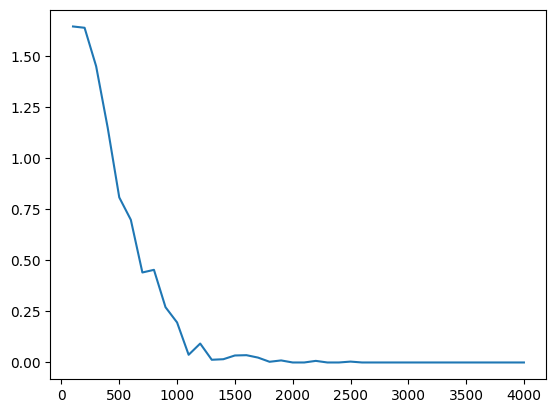

In [8]:
plt.plot(K_range, MSE)